Clustering Analysis

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms


In [1]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load EastWestAirlines Dataset
df=pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Dataset Shape
df.shape

(3999, 12)

In [4]:
# Data Types & Null Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
#Statistical Snapshot
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


Exploratory Data Analysis(EDA)

In [6]:
# Check missing values per column
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [7]:
df.sample(30) # random sample of rows or columns from a DataFrame

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
2464,2483,45522,0,3,1,1,10728,13,0,0,3197,0
1382,1396,66516,0,4,1,1,45406,16,200,1,5311,0
2568,2587,72598,0,1,1,1,6090,8,1100,1,2804,0
1233,1246,23786,0,1,1,1,16950,4,0,0,5364,0
280,284,168515,0,1,1,1,4600,4,0,0,7269,0
2932,2954,76177,0,4,1,1,31922,16,0,0,3057,0
1653,1669,78032,0,3,1,1,24046,23,0,0,4862,0
2869,2891,43310,0,3,1,1,11943,14,0,0,1804,0
2306,2324,11457,0,1,1,1,705,3,0,0,3767,0
1795,1812,104052,0,2,1,1,6016,12,0,0,4331,0


In [8]:
# Count duplicate rows
df.duplicated().sum()

np.int64(0)

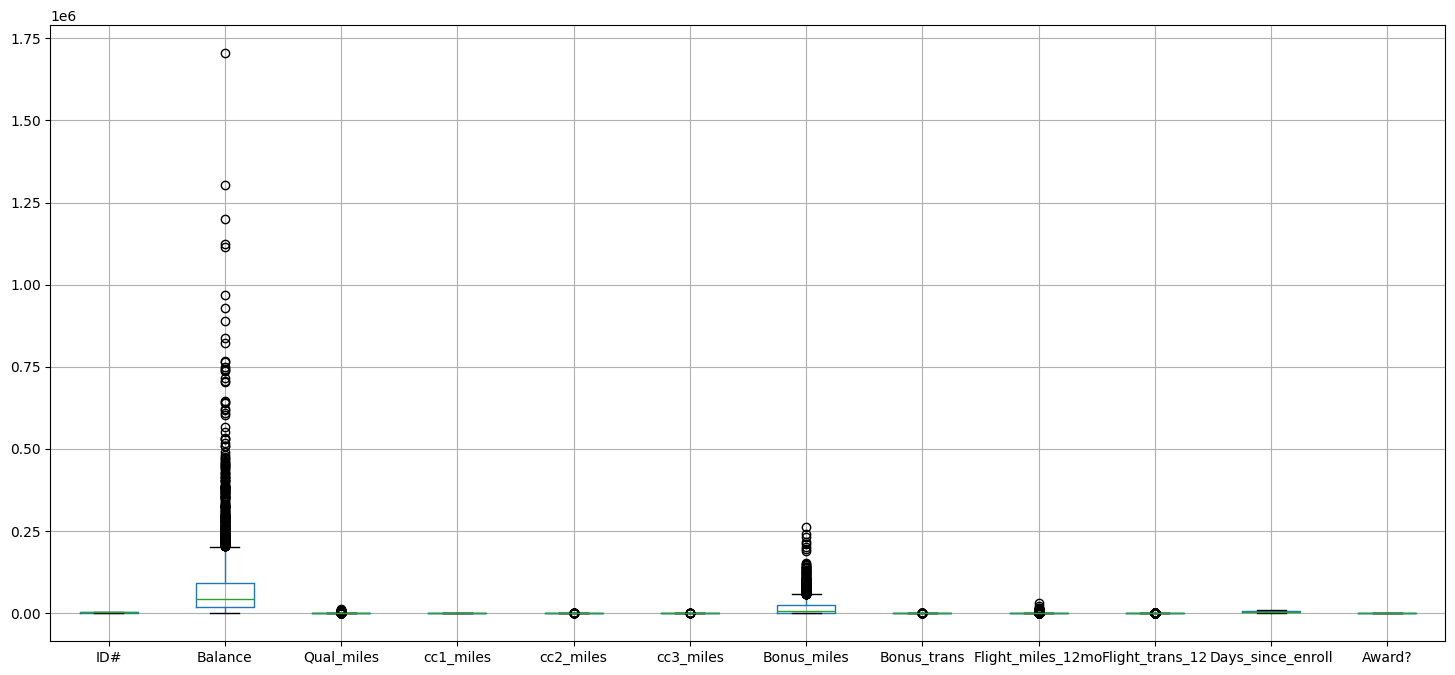

In [9]:
# outliers
df.boxplot(figsize=(18,8))
plt.show()

In [10]:
# Outlier Detection using IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers


,0
ID#,0
Balance,266
Qual_miles,226
cc1_miles,0
cc2_miles,43
cc3_miles,18
Bonus_miles,280
Bonus_trans,63
Flight_miles_12mo,569
Flight_trans_12,565


In [11]:
def outlier_capping(df,columns):
    Q1= df[columns].quantile(0.25)
    Q3= df[columns].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[columns]=df[columns].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(include=['int','float']).columns:
    outlier_capping(df,col)

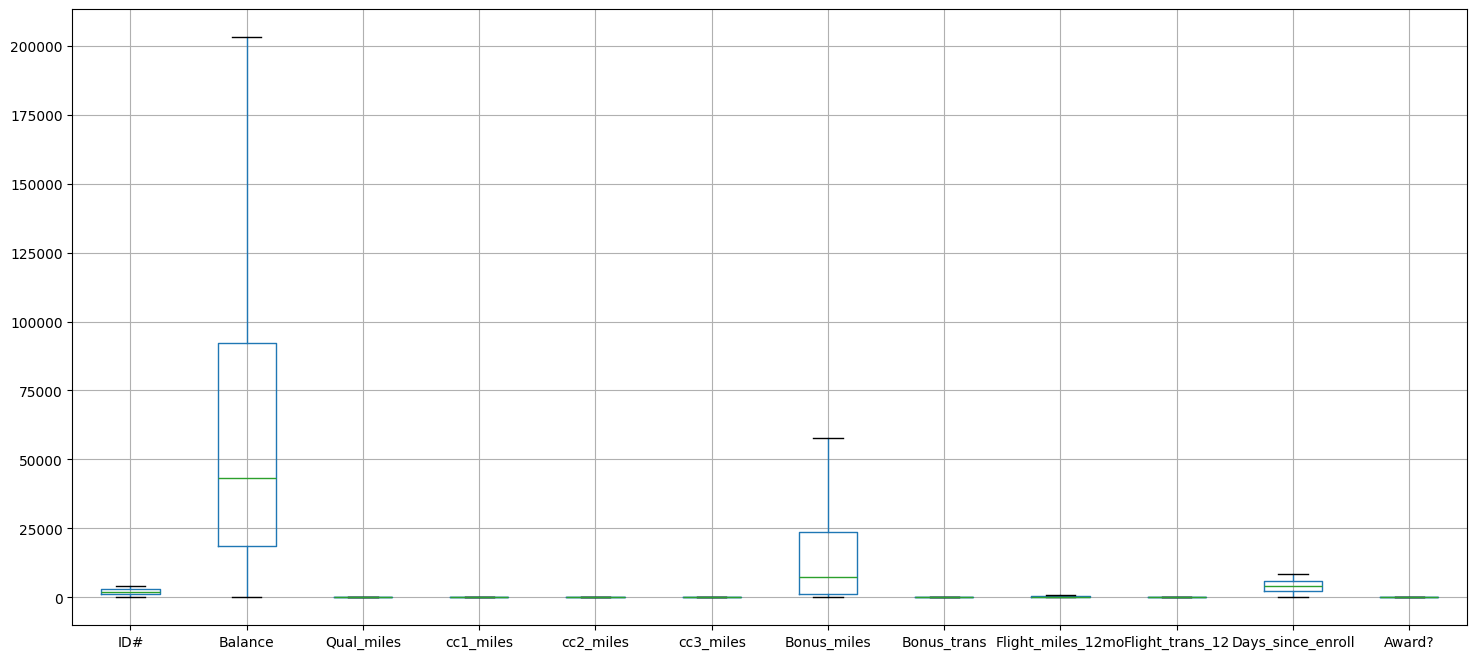

In [12]:
df.boxplot(figsize=(18,8))
plt.show()

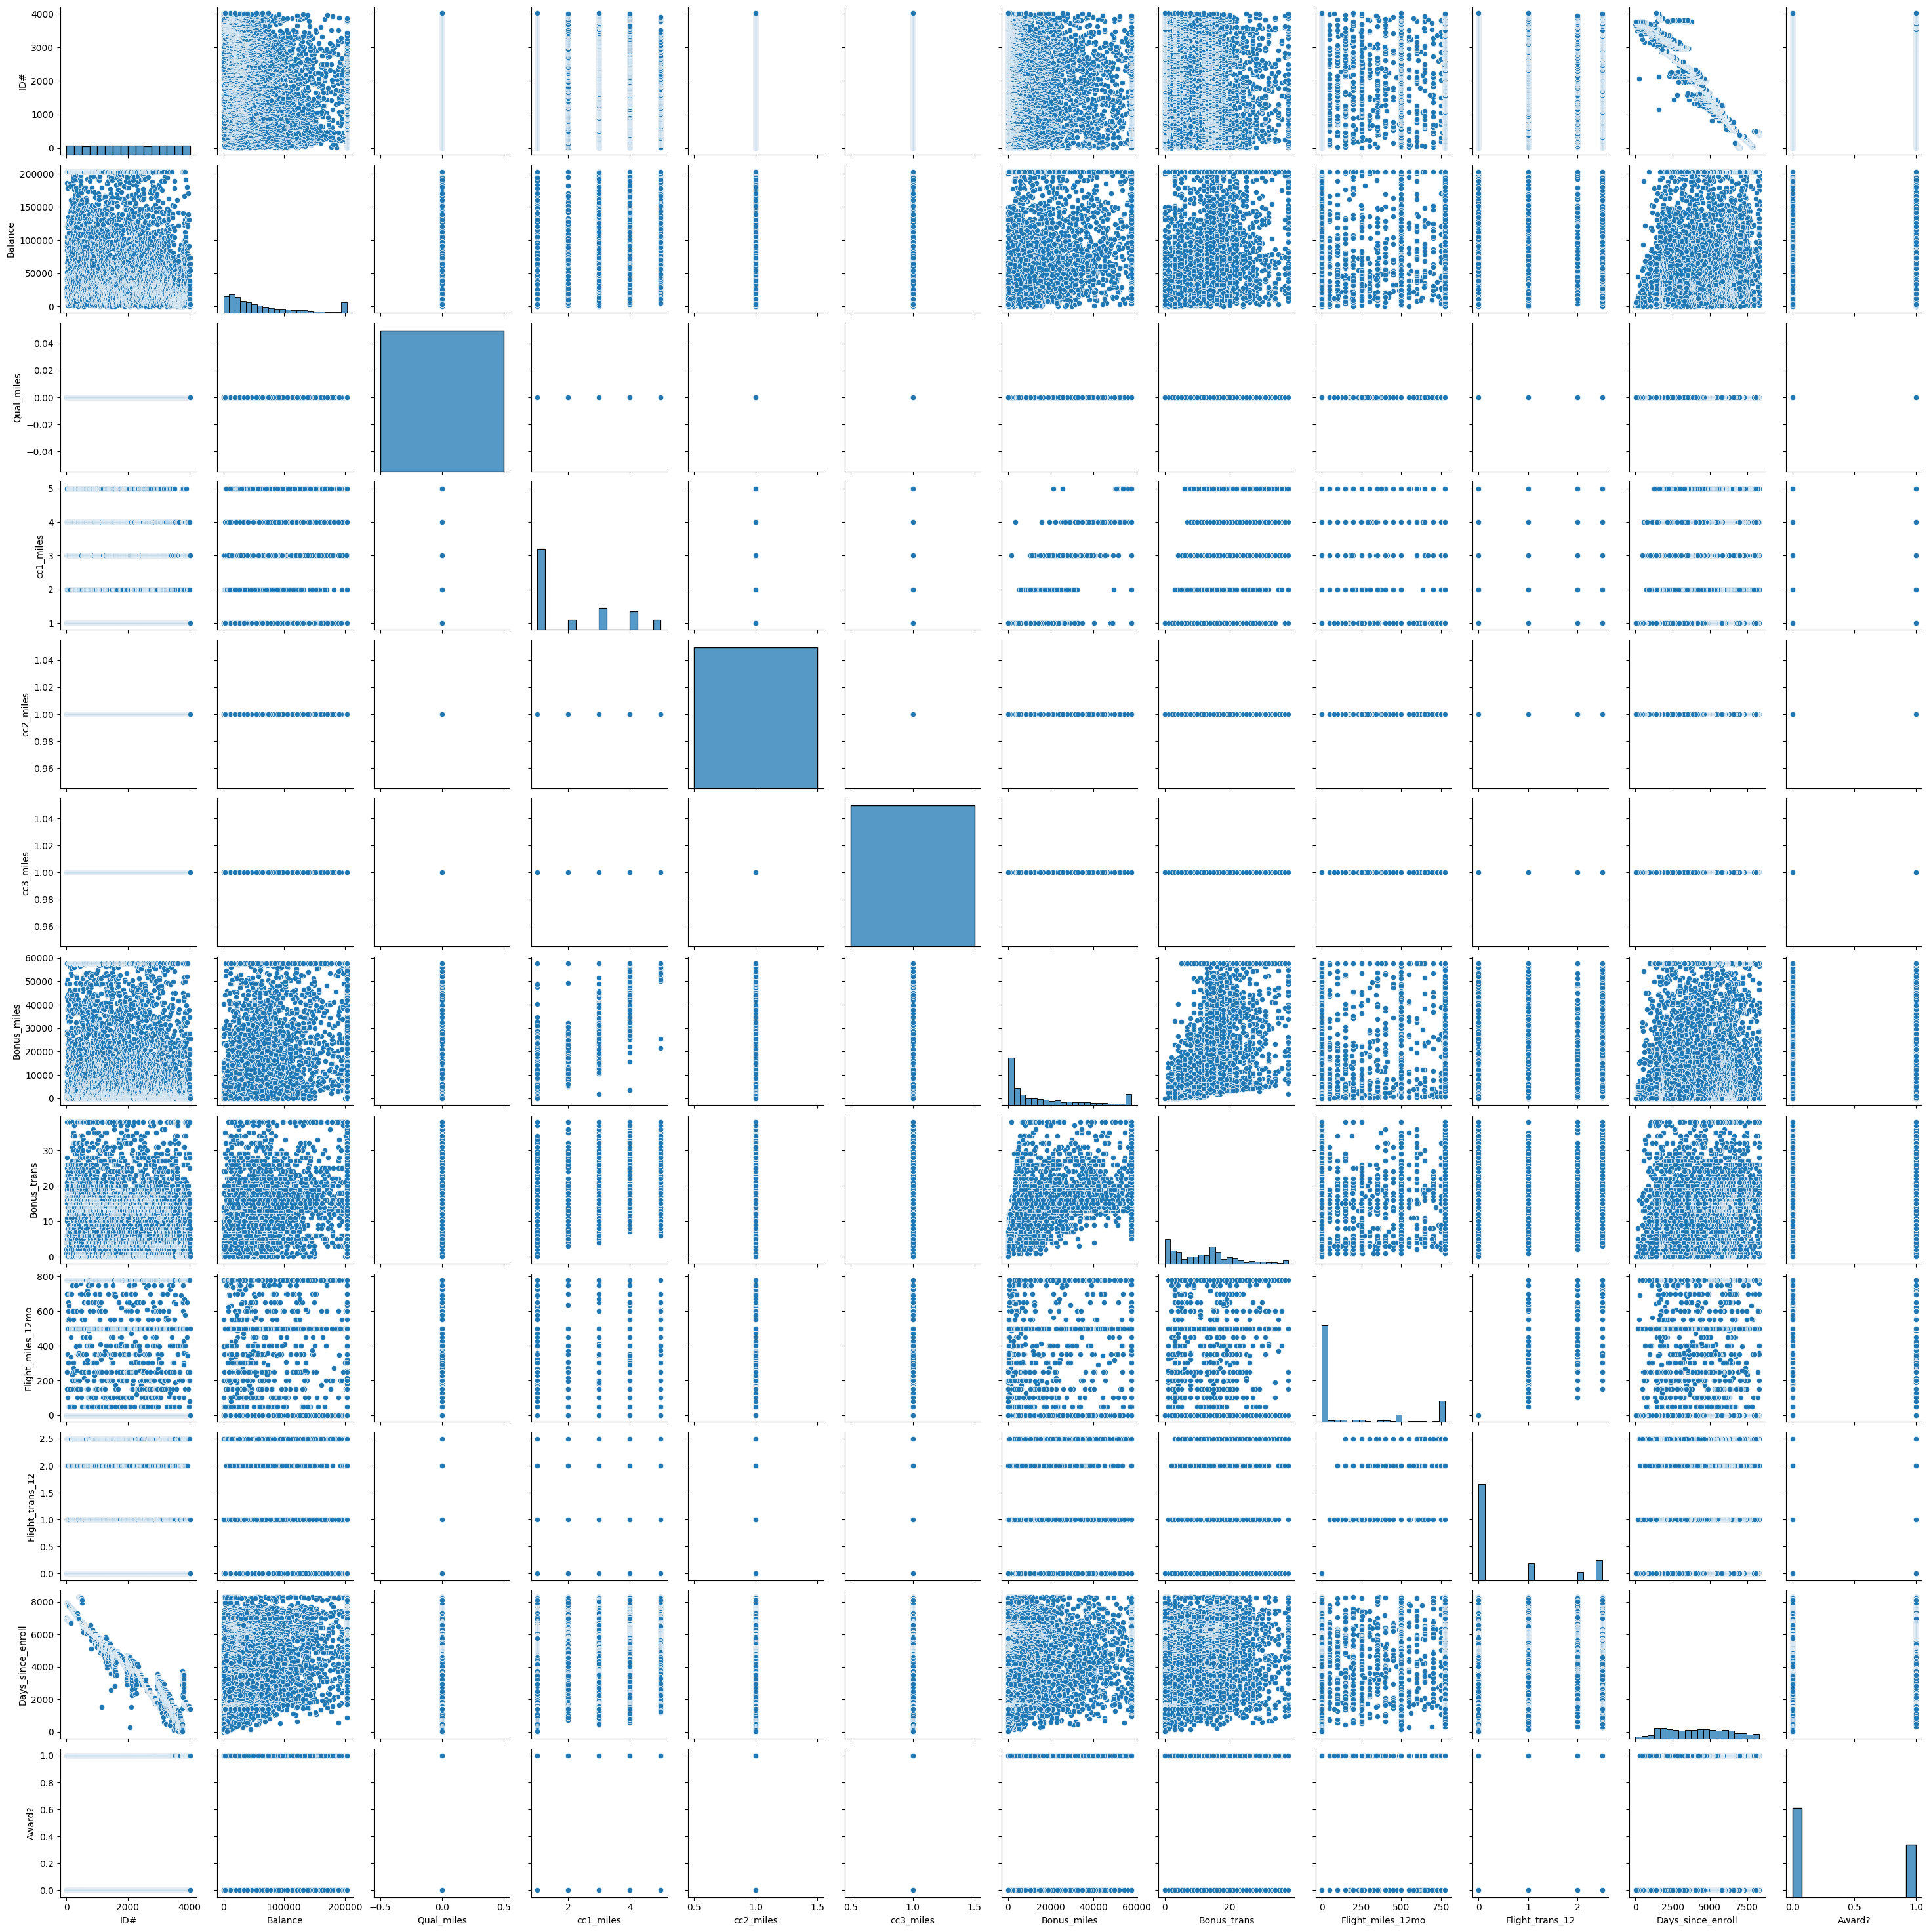

In [13]:
sns.pairplot(df)
plt.show()

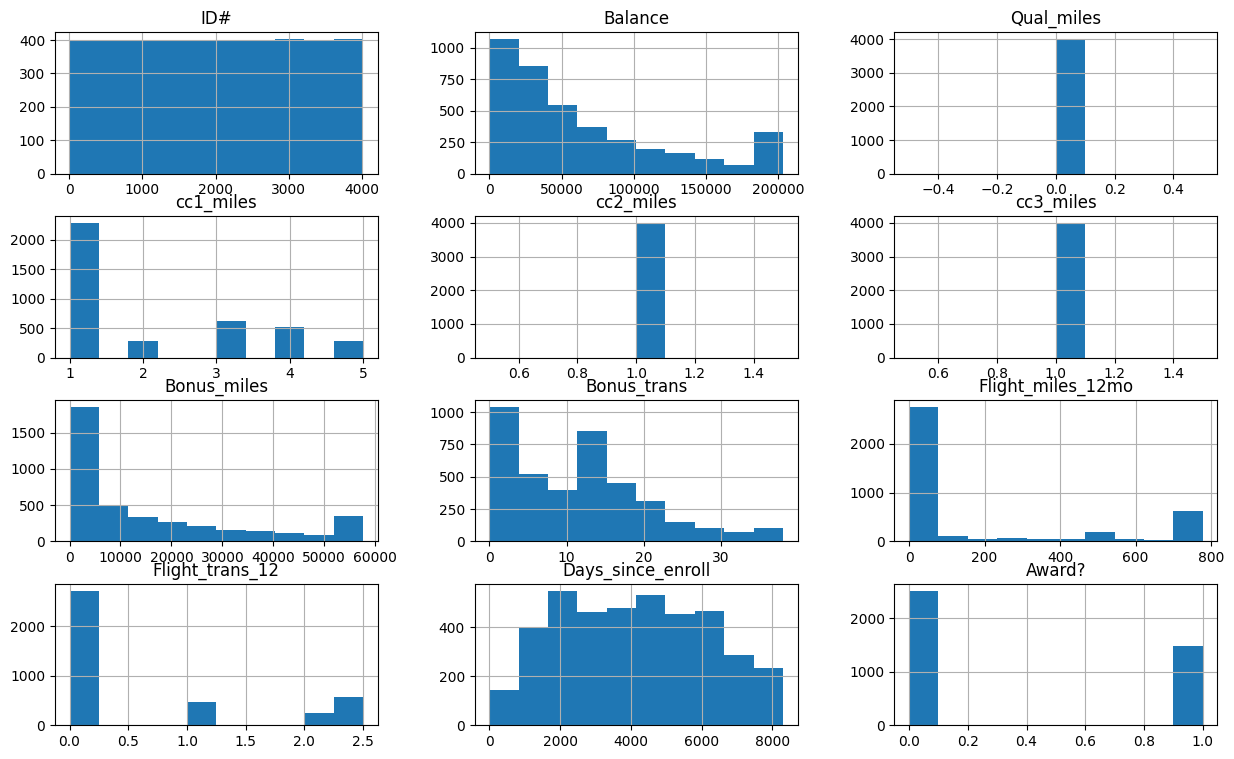

In [14]:
df.hist(figsize=(15,9))
plt.show()

In [15]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [16]:
df.nunique()

,0
ID#,3999
Balance,3639
Qual_miles,1
cc1_miles,5
cc2_miles,1
cc3_miles,1
Bonus_miles,2458
Bonus_trans,39
Flight_miles_12mo,79
Flight_trans_12,4


In [17]:
df=df.rename(columns={'ID#': "ID", 'Award?':"Award"}) #Renames column names in your DataFrame
df.set_index("ID", inplace=True) # Sets the ID column as the index of the DataFrame
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1
4018,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1
4019,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1


In [18]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,63768.635784,0.0,2.059515,1.0,1.0,15410.730683,11.470618,178.055639,0.591523,4118.55939,0.370343
std,58673.700736,0.0,1.376919,0.0,0.0,18074.733482,9.115104,294.678028,0.944826,2065.13454,0.482957
min,0.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,18527.500000,0.0,1.000000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,43097.000000,0.0,1.000000,1.0,1.0,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,92404.000000,0.0,3.000000,1.0,1.0,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,203218.750000,0.0,5.000000,1.0,1.0,57626.250000,38.000000,777.500000,2.500000,8296.00000,1.000000


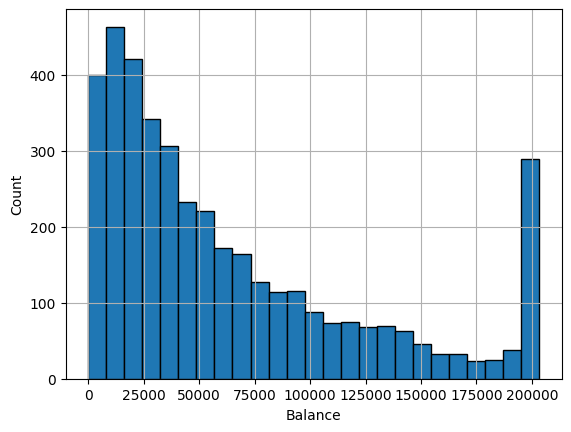

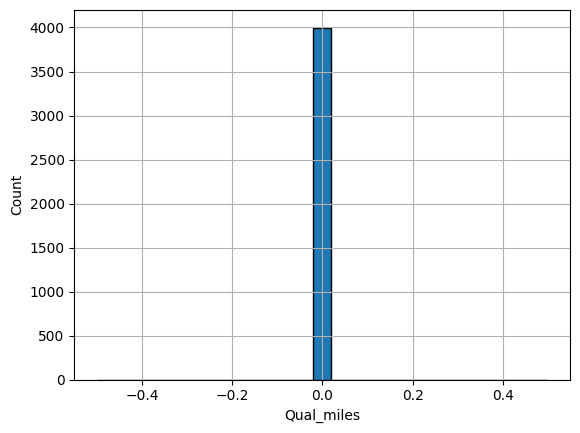

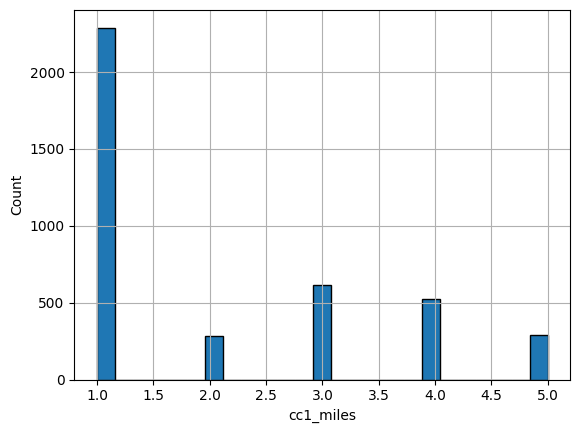

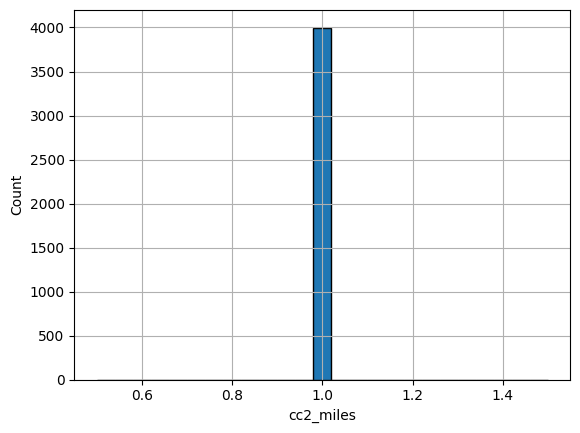

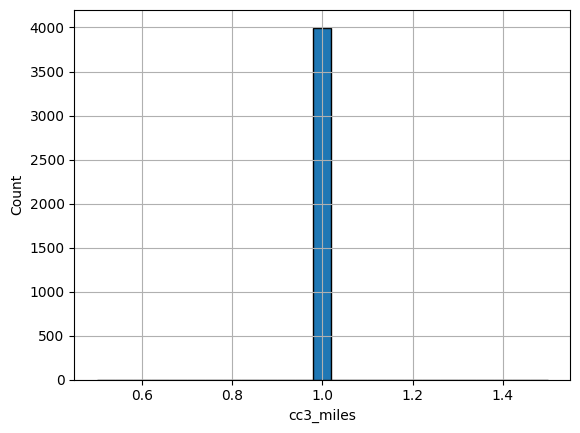

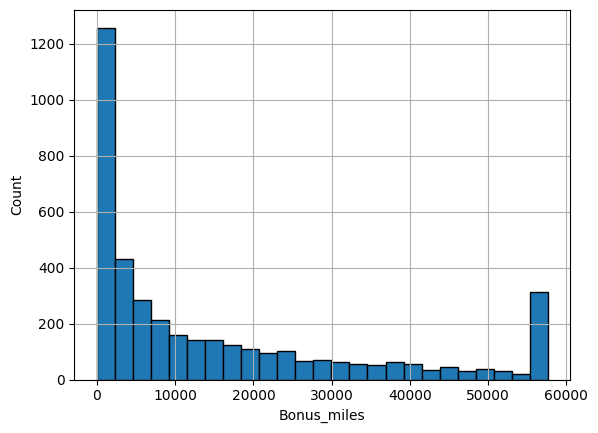

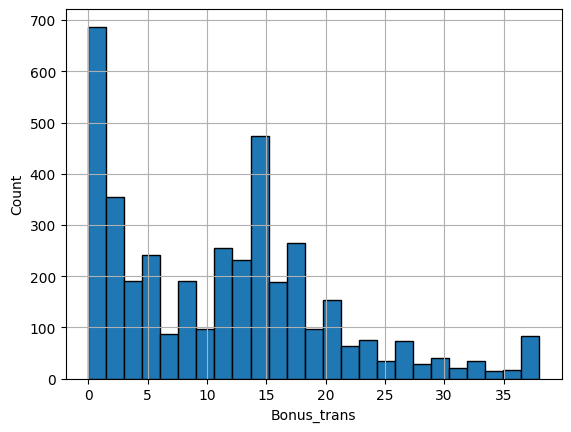

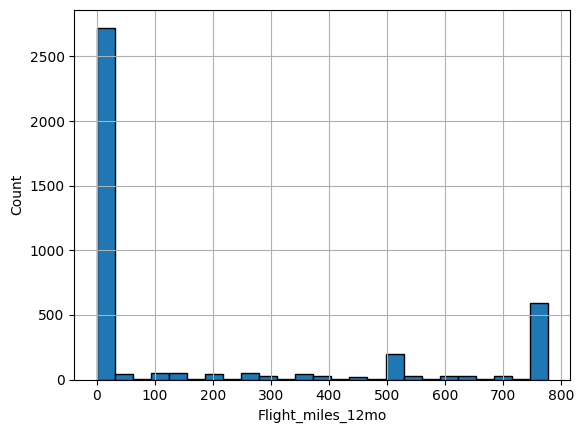

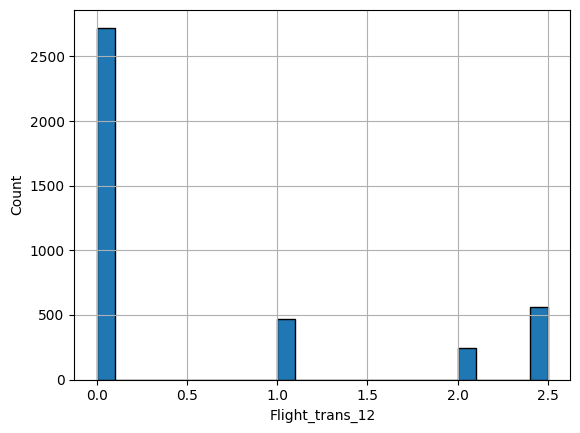

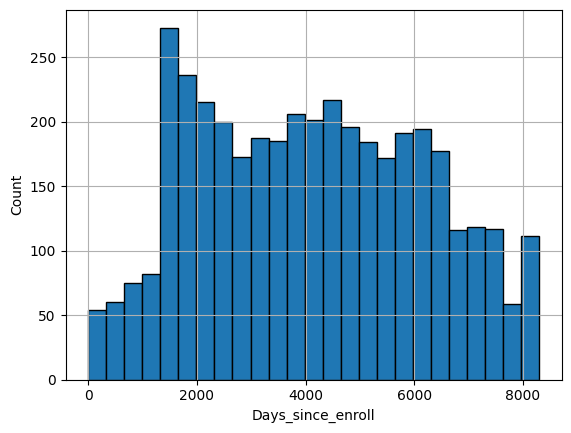

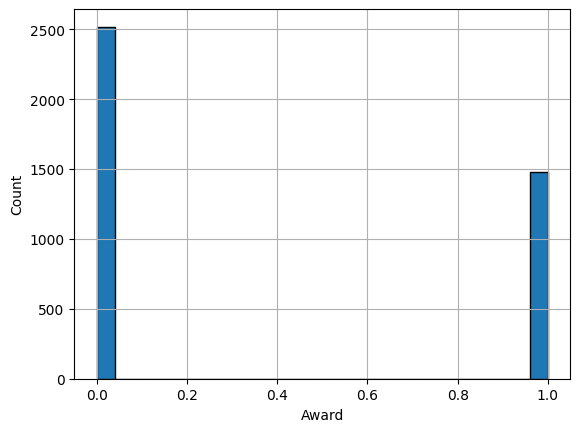

In [19]:
for feature in df.columns:
    df=df.copy()
    df[feature].hist(bins=25, edgecolor="Black")
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.show()

Balance


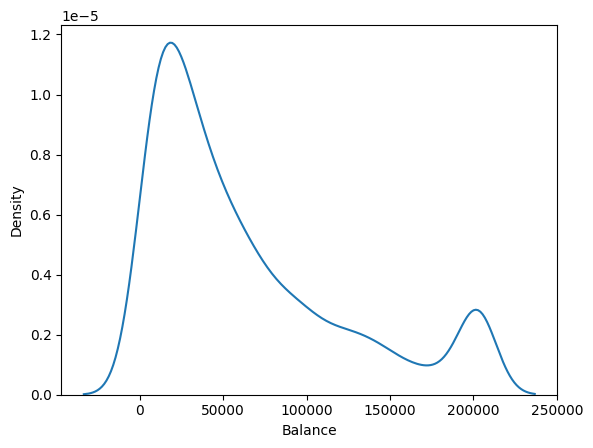

Qual_miles


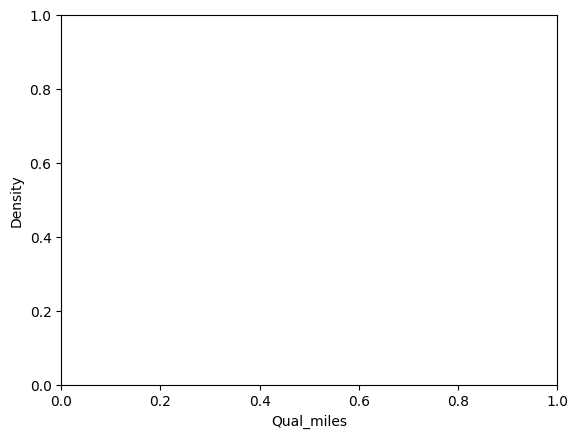

cc1_miles


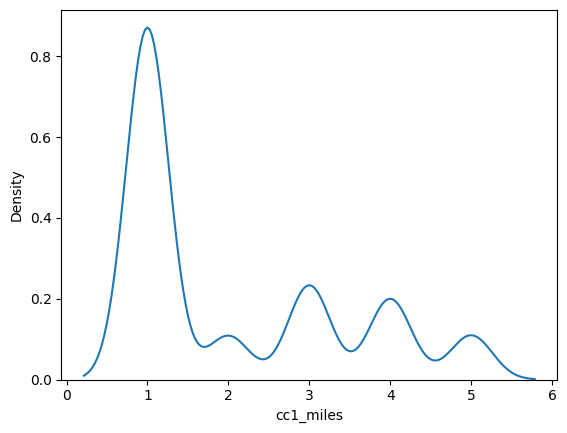

cc2_miles


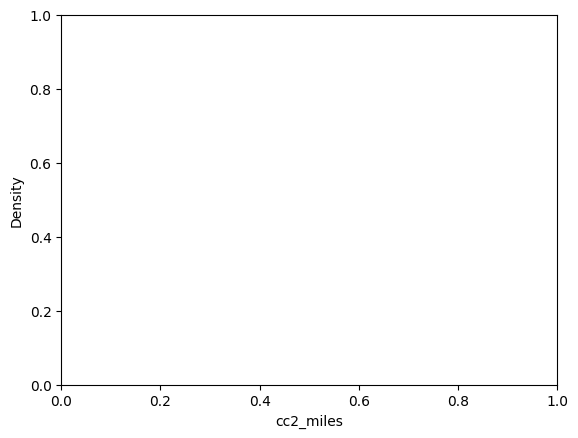

cc3_miles


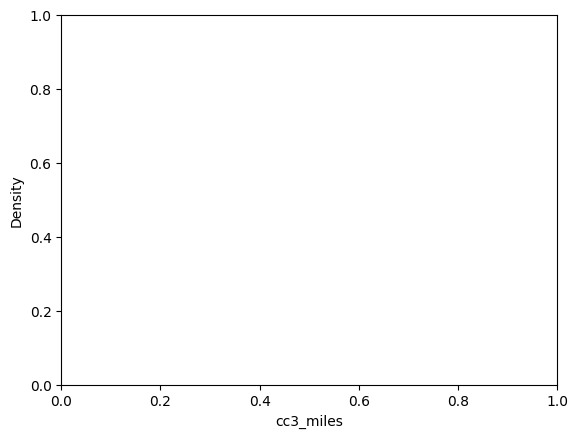

Bonus_miles


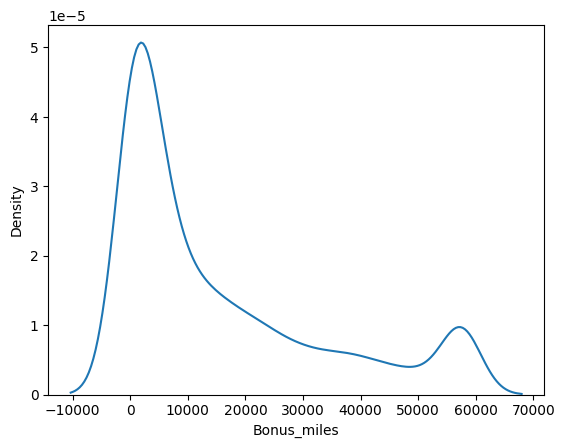

Bonus_trans


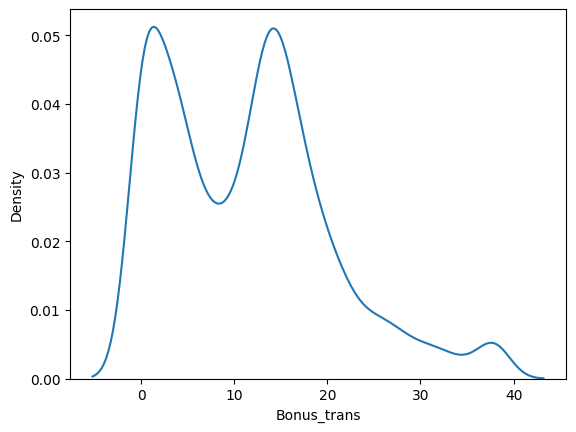

Flight_miles_12mo


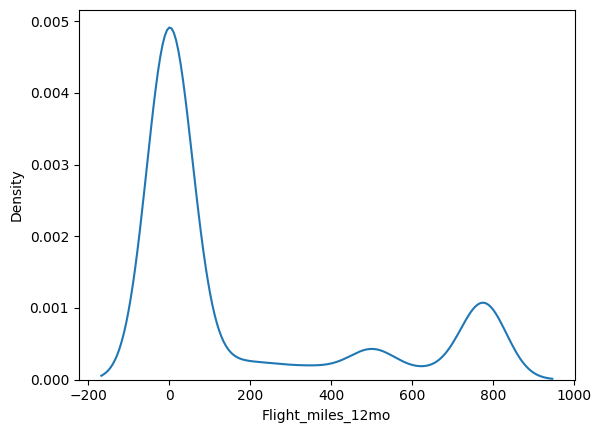

Flight_trans_12


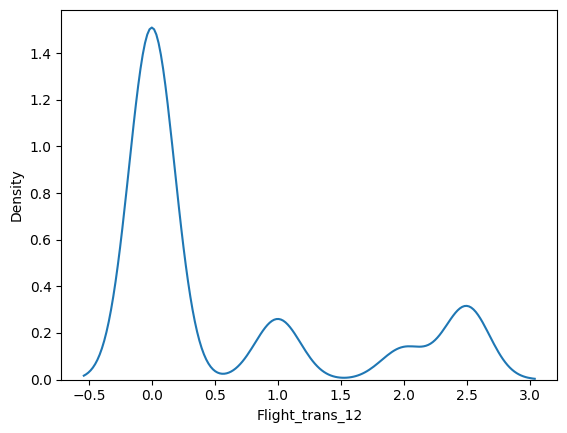

Days_since_enroll


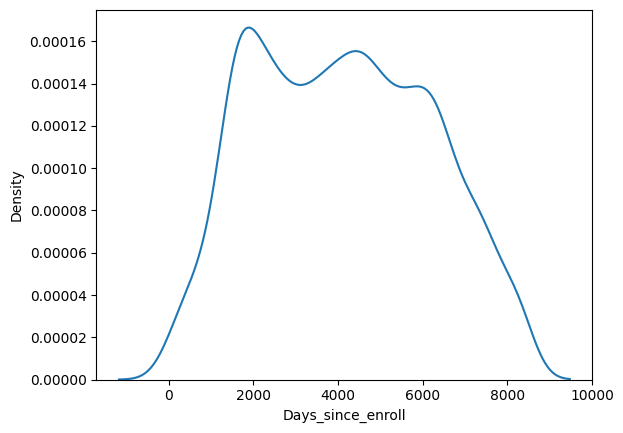

Award


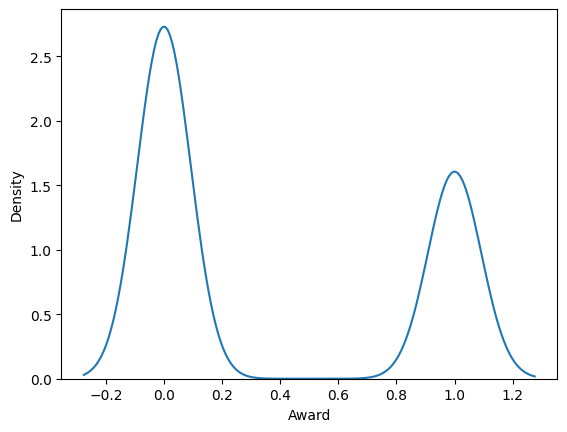

In [20]:
# Kernel Density for every feature, singled out

for n in df.columns:
    print(n)
    sns.kdeplot(df[n])
    plt.show()


In [21]:
df[['Qual_miles','cc2_miles','cc3_miles']].describe()

,Qual_miles,cc2_miles,cc3_miles
count,3999.0,3999.0,3999.0
mean,0.0,1.0,1.0
std,0.0,0.0,0.0
min,0.0,1.0,1.0
25%,0.0,1.0,1.0
50%,0.0,1.0,1.0
75%,0.0,1.0,1.0
max,0.0,1.0,1.0


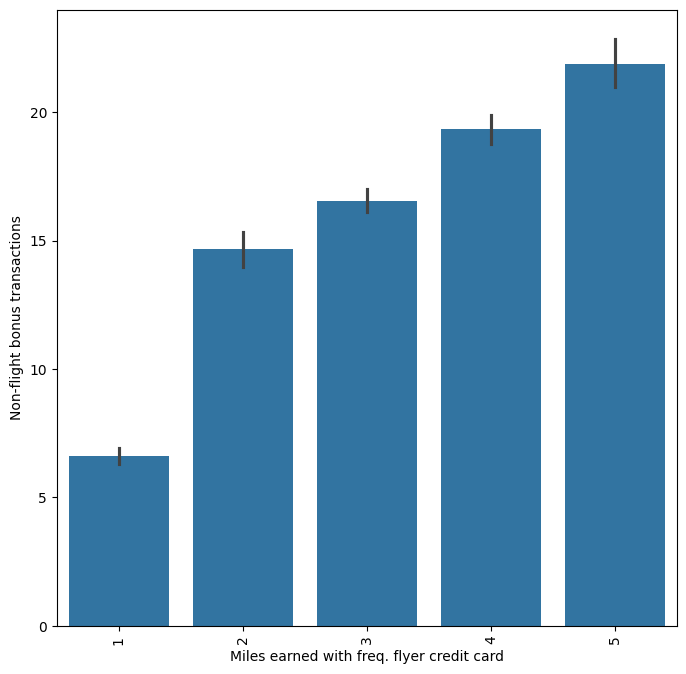

In [22]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (8,8))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

Standardizing the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(3999, 11)

Normalizing the data

why:
Before : 5000, 10000, 20000
After MinMax Scaling : 0.0, 0.33, 1.0

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(3999, 11)

Implement the K-Means, hierarchical, and DBSCAN algorithms

K-Mean Clustering Algorithm

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [28]:
# Elbow Method
wcss = [] # WCSS = Within-Cluster Sum of Squares - the total squared distance between each data point and its assigned cluster center.
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)



In [29]:
kmeans.fit(std_df) # using StandardScaler


KMeans(n_clusters=10, random_state=42)

In [30]:
wcss.append(kmeans.inertia_)

In [31]:
kmeans.inertia_
kmeans.labels_

array([5, 5, 5, ..., 3, 7, 2], dtype=int32)


The scatter plot visualizes K-Means cluster assignments using two selected features. Since clustering was performed in a higher-dimensional space, this visualization provides only a partial view of the cluster structure. PCA was used to project the data into two dimensions for better interpretability.

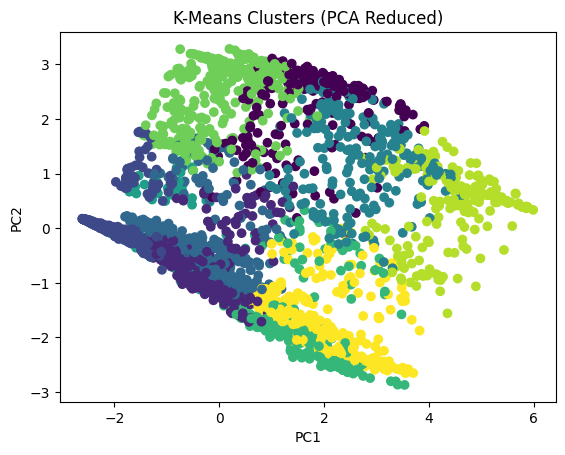

In [32]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(std_df)

plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clusters (PCA Reduced)")
plt.show()

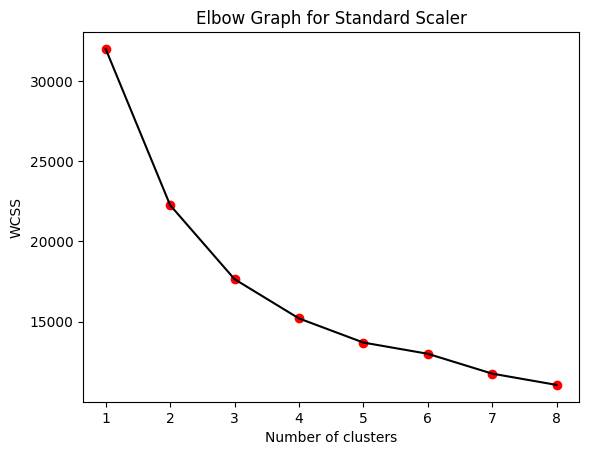

In [33]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

silhouette score is one of the most important evaluation metrics for K-Means: Silhouette Score measures how good your clustering is.

In [34]:
from sklearn.metrics import silhouette_score

# Range of clusters
n_clusters = range(2, 11)

clusters_inertia = []   # WCSS / Inertia
s_scores = []           # Silhouette scores

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(std_df)

    clusters_inertia.append(kmeans.inertia_)
    s_scores.append(silhouette_score(std_df, labels))

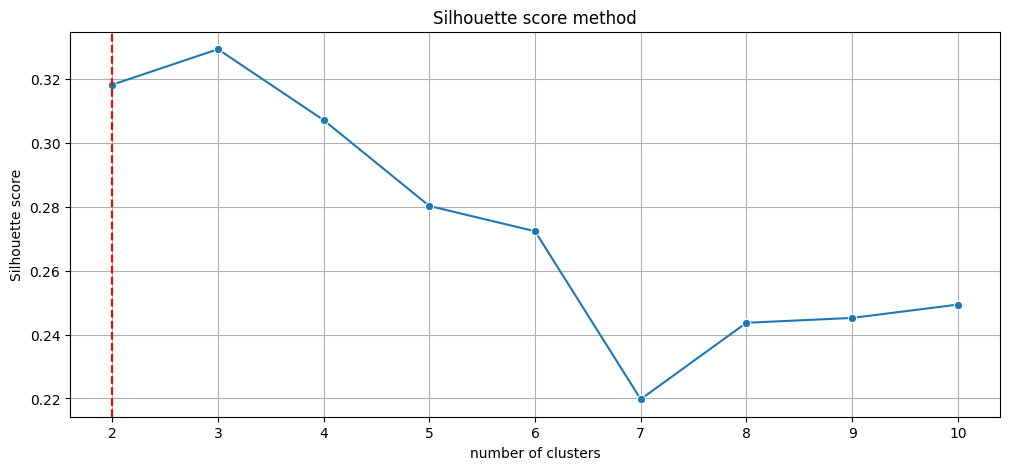

In [35]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red") # when K= 2, The red vertical dashed line marks the selected number of clusters.
plt.grid()
plt.show()

In [37]:
silhouette_kmeans = silhouette_score(std_df, kmeans.labels_)
print("K-Mean Silhouette Score:", silhouette_kmeans)

K-Mean Silhouette Score: 0.24937906617493016


HIERARCHICAL CLUSTERING

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [39]:
linked=linkage(std_df, method="ward")


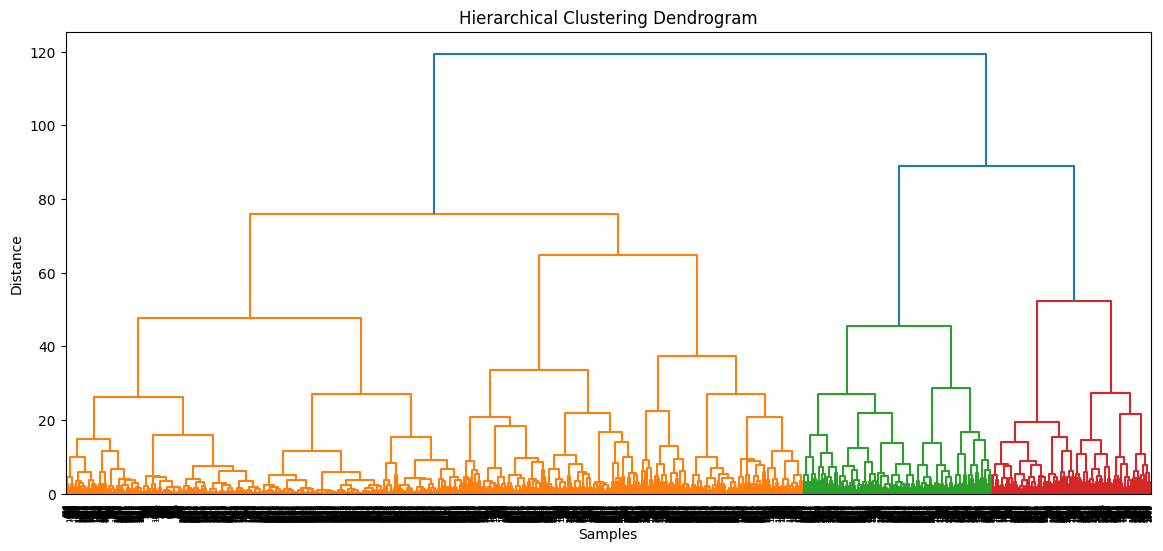

In [40]:
# Dendrogram
plt.figure(figsize=(14,6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [43]:
# Cut the dendrogram at a chosen distance threshold
# A threshold around 75 is selected based on visual inspection of the dendrogram,
# as it intersects large vertical gaps and yields well-separated clusters
clusters_hierarchical = fcluster(
    linked,
    t=75,                # distance threshold
    criterion='distance' # cut by distance
)

In [45]:
std_df = pd.DataFrame(std_df, columns=df.columns, index=df.index)
std_df['cluster_hierarchical'] = clusters_hierarchical

In [46]:
print(std_df[['cluster_hierarchical']].head())

    cluster_hierarchical
ID                      
1                      1
2                      1
3                      1
4                      1
5                      4


In [47]:
print(std_df['cluster_hierarchical'].value_counts().sort_index())

cluster_hierarchical
1    1464
2    1255
3     697
4     583
Name: count, dtype: int64


In [49]:
# Silhouette Score for Hierarchical
silhouette_hierarchical = silhouette_score(std_df, clusters_hierarchical)
print("Hierarchical Silhouette Score:", silhouette_hierarchical)

Hierarchical Silhouette Score: 0.2560616385974913


DBSCAN CLUSTERING

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

minPts (minimum samples) in DBSCAN

In [51]:
n_features = minmax_df.shape[1]
# Rule of thumb: minPts = 2 × number of features
minPts = 2 * n_features
minPts

22

In [52]:
X_dbscan = minmax_df

In [53]:
# Fit nearest neighbors model
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(minmax_df)
distances, indices = neighbors_fit.kneighbors(minmax_df)

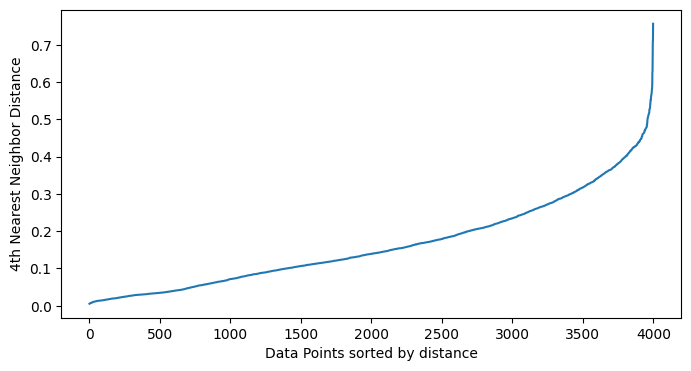

In [54]:
distances = np.sort(distances[:,4], axis=0)

plt.figure(figsize=(8,4))
plt.plot(distances)
plt.ylabel("4th Nearest Neighbor Distance")
plt.xlabel("Data Points sorted by distance")
plt.show()

eps in DBSCAN

In [55]:
dbscan_model=DBSCAN(eps=0.7, min_samples=3)

In [56]:
dbscan_model.fit(minmax_df)

DBSCAN(eps=0.7, min_samples=3)

In [57]:
dbscan_model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [58]:
std_df["Dbscan_cluster"]=dbscan_model.labels_

Evaluation and Performance Metrics:

In [59]:
silhouette_dbscan = silhouette_score(minmax_df, dbscan_model.labels_)
print("DBSCAN Silhouette Score:", silhouette_dbscan)


DBSCAN Silhouette Score: 0.35544923687092084


In [60]:
silhouette_summary = pd.DataFrame({
    "Algorithm": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [
        silhouette_kmeans,
        silhouette_hierarchical,
        silhouette_dbscan
    ]
})

silhouette_summary

,Algorithm,Silhouette Score
0,K-Means,0.249379
1,Hierarchical,0.256062
2,DBSCAN,0.355449
